In [15]:
import os
from PIL import Image
directorio = "/Users/vivi/Google Drive/ITBA/imagenes"
#directorio = "/Users/juan/Google Drive/Mi unidad/facultad/itba/imagenes"

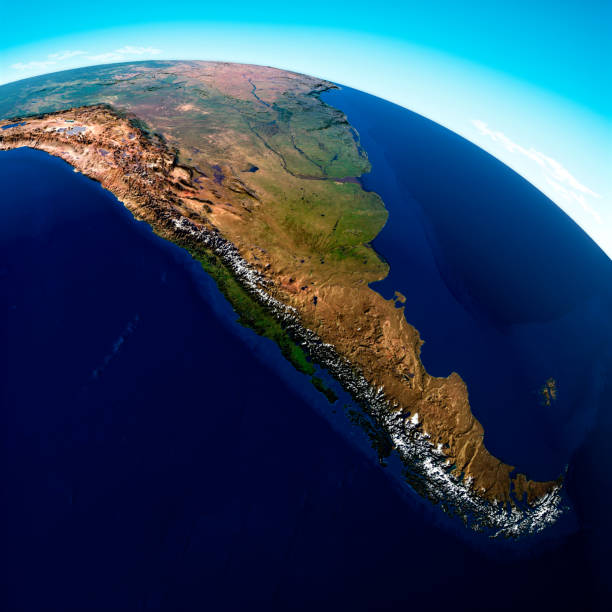

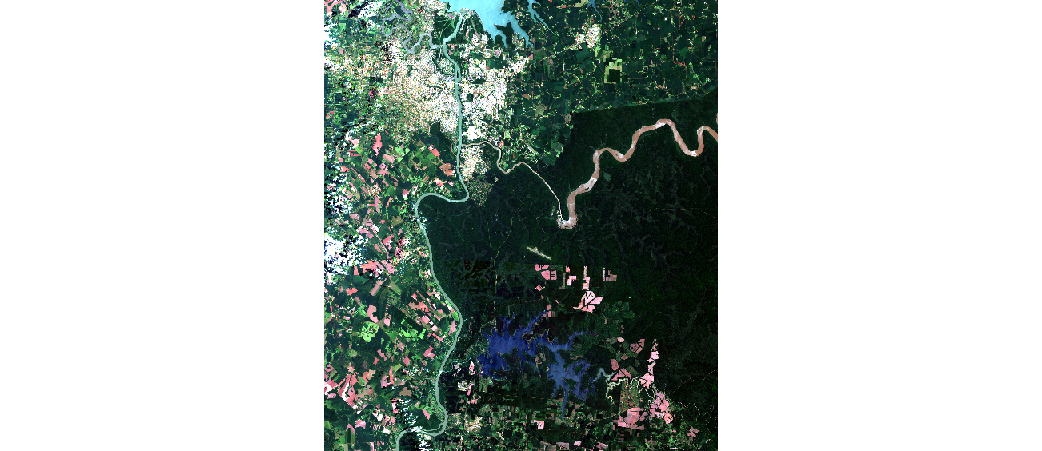

In [17]:
# 2a)
# mostramos la imagen 


# Armamos las rutas completas
ruta_img1 = os.path.join(directorio, "argentina.jpg")
ruta_img2 = os.path.join(directorio, "LC08_224-078_2018-01-05_RGB.png")

# Abrimos las imágenes
img = Image.open(ruta_img1)
img2 = Image.open(ruta_img2)

# Mostramos las imágenes
display(img)
display(img2)




In [18]:
# Definimos el nombre del nuevo archivo
nombre_archivo = "argentina2.jpg"

# Armamos la ruta completa
ruta_salida = os.path.join(directorio, nombre_archivo)

# Guardamos la imagen
img.save(ruta_salida)

In [19]:
# 2c)
# Acá verificamos que la imagen satelital es de 4 canales, siendo el 4to el Alpha (transparencia). Algo comun en las imágenes png. 
# una imagen JPG tiene 3 canales.
print("Imagen 1 es: ", img.mode) 
print("Imagen 2 es: ", img2.mode)

# Obtener el valor de un pixel en la imagen
pixel_img = img.getpixel((200, 150))
pixel_img2 = img2.getpixel((353, 353))
print(f"Valor del pixel en (353, 353): {pixel_img}")
print(f"Valor del pixel en (200, 150): {pixel_img2}")

# Esto nos devuelve el valor de la tupla para cada una de las posiciones. Podemos ver que para la imagen 1 es de 3 bandas (RGB) y para la imagen 2 es de 4 bandas (RGBA).

Imagen 1 es:  RGB
Imagen 2 es:  RGBA
Valor del pixel en (353, 353): (135, 109, 92)
Valor del pixel en (200, 150): (104, 162, 97, 255)


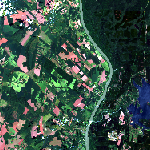

In [20]:
# 2d) Copiar una parte de la imagen en otra imagen nueva
img_cortada = img2.crop((350, 250, 500, 400)).convert("RGB")  # (left, upper, right, lower)
display(img_cortada)

In [21]:
#2e)
# Guardar la imagen cortada en un nuevo archivo
# Definimos el nombre del archivo de salida
nombre_corte = "imagen_cortada.png"

# Armamos la ruta completa
ruta_corte = os.path.join(directorio, nombre_corte)

# Guardamos la imagen cortada
img_cortada.save(ruta_corte)

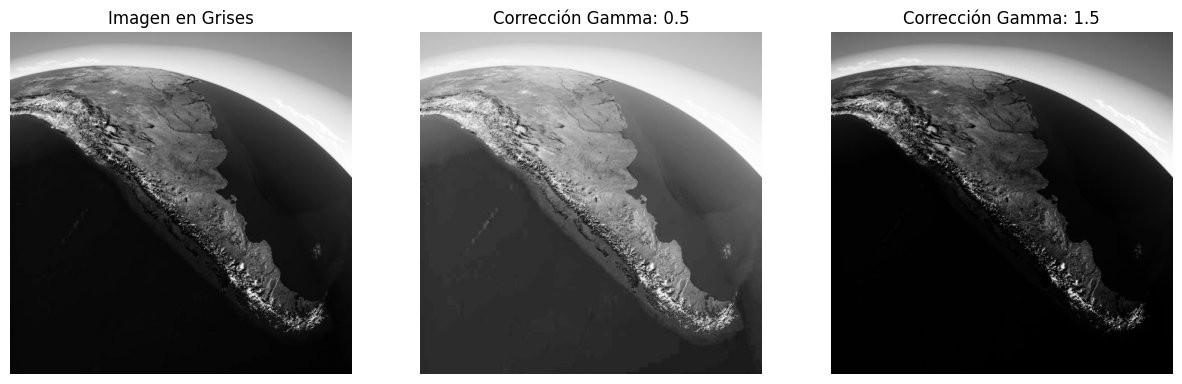

In [24]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# usamos convert para pasar la imagen 1 a niveles de gris.
img_gris = img.convert("L")

# definimos una función de corrección gamma.
# metemos la imagen en un array de numpy, aplicamos la corrección gamma y volvemos a convertir a imagen.
def gamma_correction(img, gamma):
    img_array = np.array(img)
    # normalizamos, aplicamos gama y reescalamos nuevamente para mostrarlo. Por que la corrección gamma se hace sobre valores entre 0 y 1.
    out = (img_array / 255) ** (gamma) * 255 # esta es la corrección 
    return Image.fromarray(np.uint8(out)) # hay que convertir a uint8 para que sea una imagen válida
valores_gamma = [0.5, 1.5]
plt.figure(figsize=(15, 5))
plt.subplot(1, len(valores_gamma) + 1, 1)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en Grises')
plt.axis('off')
for i, gamma in enumerate(valores_gamma):
    img_gamma = gamma_correction(img_gris, gamma)
    plt.subplot(1, len(valores_gamma) + 1, i + 2)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f'Corrección Gamma: {gamma}')
    plt.axis('off')

plt.show()

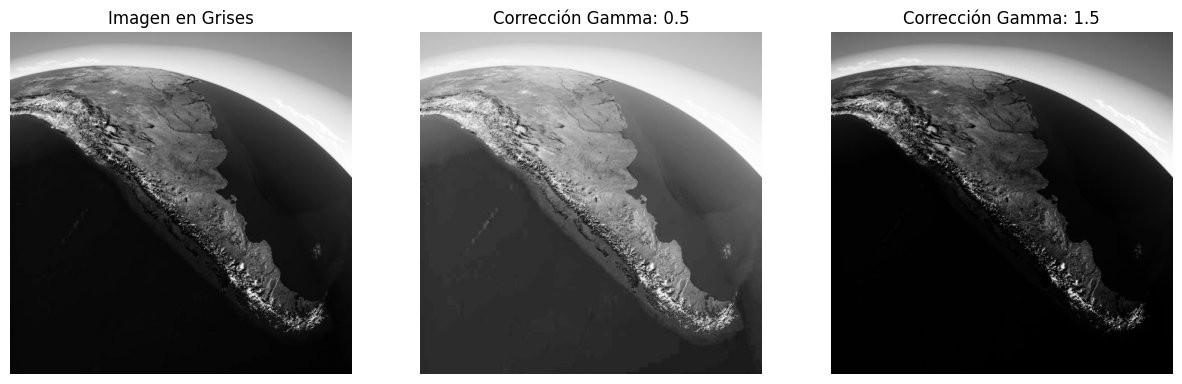

In [25]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# usamos convert para pasar la imagen 1 a niveles de gris.
img_gris = img.convert("L")

# definimos una función de corrección gamma.
# metemos la imagen en un array de numpy, aplicamos la corrección gamma y volvemos a convertir a imagen.
def gamma_correction(img, gamma):
    img_array = np.array(img)
    # normalizamos, aplicamos gama y reescalamos nuevamente para mostrarlo. Por que la corrección gamma se hace sobre valores entre 0 y 1.
    out = (img_array / 255) ** (gamma) * 255 # esta es la corrección 
    return Image.fromarray(np.uint8(out)) # hay que convertir a uint8 para que sea una imagen válida
valores_gamma = [0.5, 1.5]
plt.figure(figsize=(15, 5))
plt.subplot(1, len(valores_gamma) + 1, 1)
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en Grises')
plt.axis('off')
for i, gamma in enumerate(valores_gamma):
    img_gamma = gamma_correction(img_gris, gamma)
    plt.subplot(1, len(valores_gamma) + 1, i + 2)
    plt.imshow(img_gamma, cmap='gray')
    plt.title(f'Corrección Gamma: {gamma}')
    plt.axis('off')

plt.show()

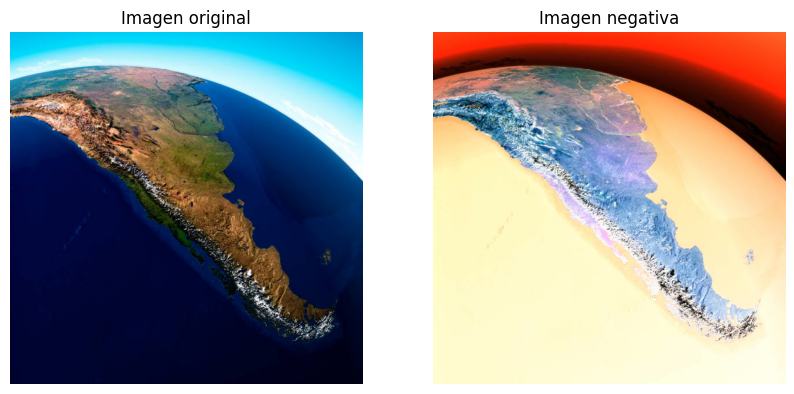

In [ ]:
#4
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Función que calcula el negativo de una imagen RGB
def negativo_rgb(img):
    # Convertimos a array numpy
    img_array = np.array(img)
    # Aplicamos negativo: 255 - valor
    negativo_array = 255 - img_array
    # Reconstruimos imagen
    return Image.fromarray(negativo_array)

# Aplicamos la función
img_negativa = negativo_rgb(img)

# Mostramos imagen original y negativa
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_negativa)
plt.title("Imagen negativa")
plt.axis("off")

plt.show()


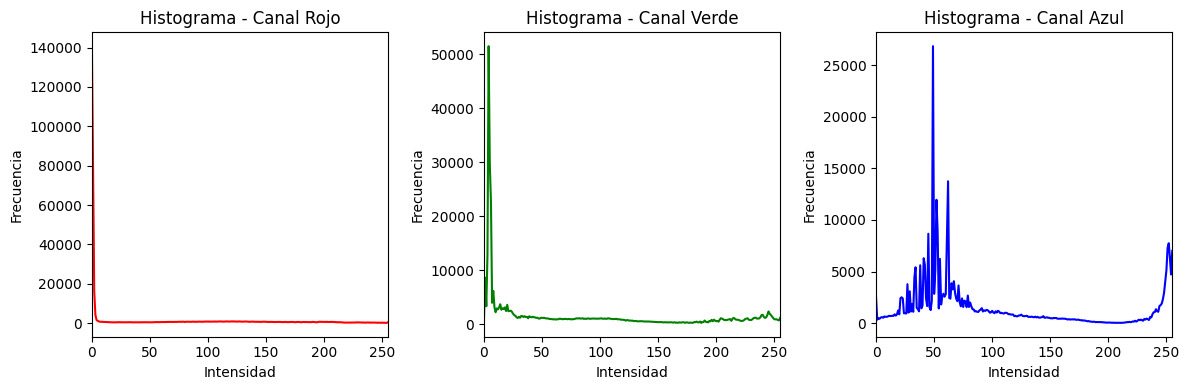

In [34]:
#5
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Función que calcula y muestra el histograma de cada banda RGB
def mostrar_histogramas_rgb(img):
    img_array = np.array(img)

    canales = ('Rojo', 'Verde', 'Azul')
    colores = ('red', 'green', 'blue')

    plt.figure(figsize=(12, 4))

    for i in range(3):
        canal = img_array[:, :, i]
        hist, _ = np.histogram(canal, bins=256, range=(0, 255))

        plt.subplot(1, 3, i + 1)
        plt.plot(hist, color=colores[i])
        plt.title(f'Histograma - Canal {canales[i]}')
        plt.xlim(0, 255)
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# 🔽 Llamamos a la función directamente sobre la imagen img
mostrar_histogramas_rgb(img)





In [35]:
#6
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def umbralizar_por_banda(img, umbral):
    # Convertimos imagen a array numpy
    img_array = np.array(img)

    # Separar los tres canales
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

    # Aplicamos el umbral a cada banda
    r_bin = np.where(r >= umbral, 255, 0).astype(np.uint8)
    g_bin = np.where(g >= umbral, 255, 0).astype(np.uint8)
    b_bin = np.where(b >= umbral, 255, 0).astype(np.uint8)

    # Convertimos cada uno en imagen PIL
    r_img = Image.fromarray(r_bin, mode="L")
    g_img = Image.fromarray(g_bin, mode="L")
    b_img = Image.fromarray(b_bin, mode="L")

    return r_img, g_img, b_img


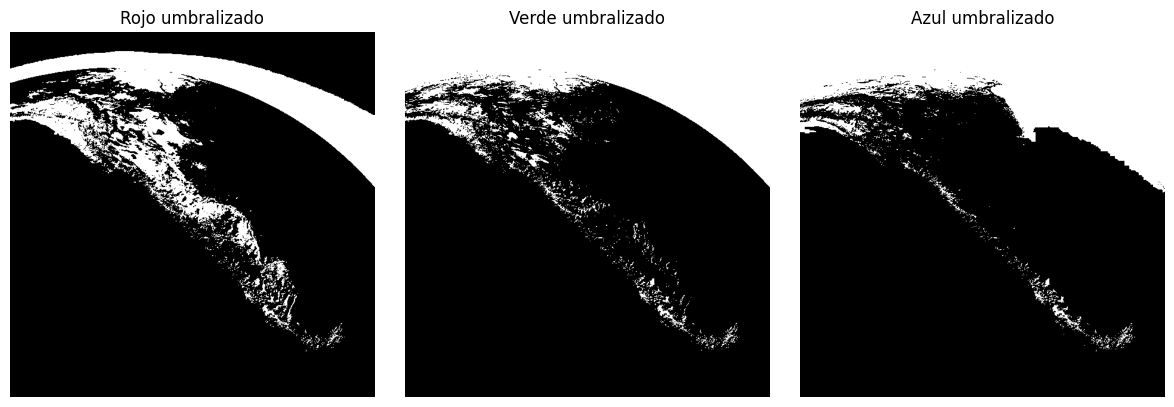

In [40]:
# Umbral deseado (por ejemplo 128)
umbral = 128

# Aplicamos la función
r_binaria, g_binaria, b_binaria = umbralizar_por_banda(img, umbral)

# Mostramos los resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r_binaria, cmap="gray")
plt.title("Rojo umbralizado")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_binaria, cmap="gray")
plt.title("Verde umbralizado")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_binaria, cmap="gray")
plt.title("Azul umbralizado")
plt.axis("off")

plt.tight_layout()
plt.show()
